In [1]:
#Import packages and dataset
import pandas as pd

df = pd.read_csv("energydata_complete.csv", header = 0)

In [2]:

print(df)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.0

In [15]:
y = df.iloc[:,1]
X = df.iloc[:,2:27]


In [4]:
from sklearn import linear_model 
import statsmodels.api as sm

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X, y) 

LinearRegression()

In [17]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 49.46462587502843
Coefficients: 
 [ 1.98965591e+00 -6.06385030e-01  1.51515388e+01 -1.77017707e+01
 -1.34775091e+01  2.54098652e+01  4.92377650e+00 -3.47045679e+00
 -1.80975329e-01 -1.87558665e-02  1.41906953e-01  7.12834412e+00
  2.87816027e-01  1.79671947e+00 -1.55097252e+00  8.14914928e+00
 -4.67168265e+00 -1.58907022e+01 -8.96177068e-01 -1.02332546e+01
  1.39665709e-01 -1.06532699e+00  1.70399317e+00  1.54069828e-01
  5.05406861e+00]


In [7]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:07:18   Log-Likelihood:            -1.1760e+05
No. Observations:               19735   AIC:                         2.353e+05
Df Residuals:                   19709   BIC:                         2.355e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          49.4646     94.589      0.523      

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numerical_col = df.select_dtypes(include= ['float64', 'int64'])
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)

numPipe  = Pipeline(steps=[
                    ('scaler',scaler),
                    ('polynomials',poly),])

transformedNumericals = numPipe.fit_transform(numerical_col)


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
numFeat = ['lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']

colTrans = ColumnTransformer(transformers=[('num', numPipe, numFeat)])
lr_pipe = Pipeline(steps=[('preprocessing', colTrans),
                      ('classifier', LinearRegression())])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
lr_pipe.fit(X_train, y_train)
trainscore =lr_pipe.score(X_train,y_train)
testscore = lr_pipe.score(X_test,y_test)

In [12]:
print(trainscore)
print(testscore)

0.3280819173150792
0.27378500127487293


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Appliances ~ lights +T1 + RH_1+ T2+ RH_2 + T3+ RH_3 + T4+RH_4+ T5 + RH_5 + T6 + RH_6 + T7+ RH_7+ T8 + RH_8 + T9+ RH_9 + T_out+ Press_mm_hg+RH_out+Windspeed+Visibility+Tdewpoint', data=df).fit()
#fit simple linear regression model


#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:07:20   Log-Likelihood:            -1.1760e+05
No. Observations:               19735   AIC:                         2.353e+05
Df Residuals:                   19709   BIC:                         2.355e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      49.4646     94.589      0.523      

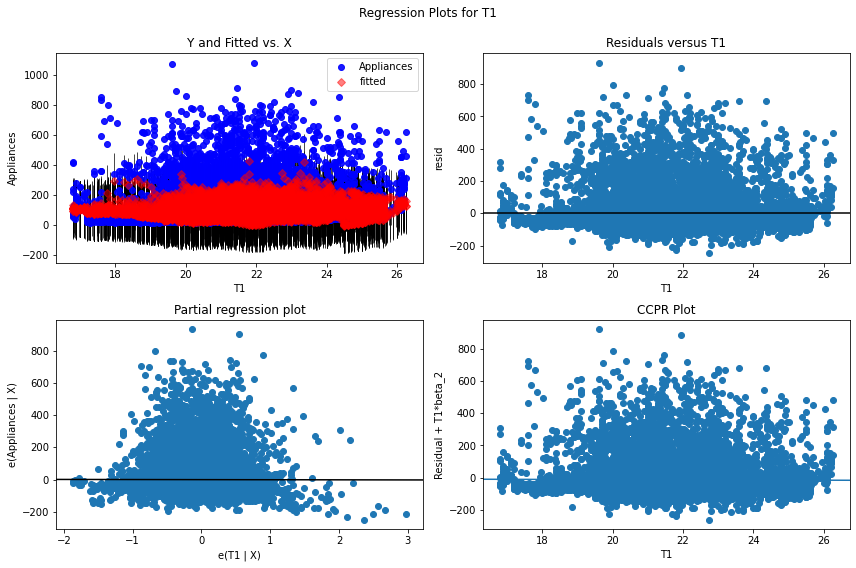

In [22]:

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'T1', fig=fig)